<a href="https://colab.research.google.com/github/adrianphilo/finance/blob/main/de/equbotic/finance/financeBas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import importlib
import financeBas as fiB
importlib.reload(fiB)

<module 'financeBas' from '/content/financeBas.py'>

**DF_ofCash**(cashRate, days, base) >> $DF = \frac 1 { 1 + cashRate * \frac{days} {base} } $  




In [ ]:
print ( fiB.DF_ofCash(0.02,  60, 360) )
print ( fiB.DF_ofCash(0.04, 120, 365) )
help(fiB.DF_ofCash)

0.9966777408637874
0.9870200108166577
Help on function DF_ofCash in module financeBas:

DF_ofCash(cashRate, days, base)
    returns the Discountfactor for a CashRate
    :param cashRate: the Cash Interestrate to be converted as a Factor
    :param days: the number of days in the period
    :param base: the DayCountBase of the Rate (e.g. 360 or 365)
    :return: the DiscountFactor at the end of the period



**ZeroRate_ofDF**(df, days) >> $ZeroRate = \frac {LOGn(df)} { \frac{days} {365} } $  

In [ ]:
print ( fiB.ZeroRate_ofDF(0.996,  60) )
print ( fiB.ZeroRate_ofDF(0.987, 120) )
help(fiB.ZeroRate_ofDF)

0.024382130168361167
0.039800936960493756
Help on function ZeroRate_ofDF in module financeBas:

ZeroRate_ofDF(df, days)
    returns the continously compounded ZeroRate for a DiscountFactor (as Factor on Base 365)
    :param DiscountFactor: to be converted
    :param days: the number of days in the period
    :return: the ZeroRate for the period



In [ ]:
import pandas as pd
daysStart = [0, 1,  2]
daysEnd   = [1, 2, 32]
curveInst = zip(daysStart, daysEnd)
#for (a, b) in curveInst:
#  print (a)
curveList = list(curveInst)
curveList
#df = pd.DataFrame(curveInst, columns = ['Name', 'Age'])
#df

[(0, 1), (1, 2), (2, 32)]

In [ ]:
def addRateToCurve(dates, dfs, zeros, cashRate, days, base, fwdstart):
  df   = fiB.DF_ofCash(cashRate, days, base)
  zero = fiB.ZeroRate_ofDF(df, days)
  if (fwdstart > 0):
    ii = dates.index(fwdstart)
    df = df * dfs[ii]

  dates.append( days ) 
  dfs  .append( df )  
  zeros.append( zero )

CurveDates = list()
CurveDFs   = list()
CurveZeros = list()

addRateToCurve(CurveDates, CurveDFs, CurveZeros, 0.09,  1, 360, 0)   #O/N
addRateToCurve(CurveDates, CurveDFs, CurveZeros, 0.09,  2, 360, 0)   #T/N
addRateToCurve(CurveDates, CurveDFs, CurveZeros, 0.09,  1, 360, 2)   #S/N

print(CurveDates)
print(CurveDFs)
CurveZeros

[1, 2, 1]
[0.9997500624843788, 0.9995002498750625, 0.9992504372657459]


[0.09123859565072018, 0.09122719510131526, 0.09123859565072018]

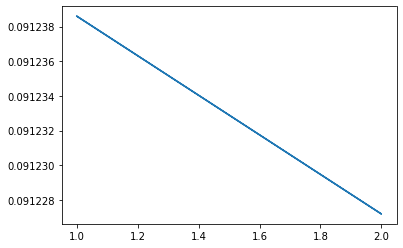

In [ ]:
import matplotlib.pyplot as plt
plt.plot(CurveDates, CurveZeros)